In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Load the text document
with open("sample1.txt", "r") as f:
    text = f.read()

# Preprocess the text
tokens = word_tokenize(text.lower())
words = [word for word in tokens if word.isalpha()]

# Calculate the word frequency distribution
fdist = FreqDist(words)
print(fdist.most_common(10))


[('the', 22), ('of', 19), ('and', 16), ('to', 12), ('doth', 9), ('in', 8), ('is', 7), ('for', 6), ('a', 5), ('that', 5)]


In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

# ask user to input text document
text = input("Enter the text document: ")

# tokenize the text into words and sentences
tokens = word_tokenize(text)
sentences = sent_tokenize(text)

# remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# calculate word frequency and get most common words
fdist = FreqDist(words)
most_common_words = fdist.most_common(10)

# calculate average sentence length and sentence complexity
total_words = len(words)
total_sentences = len(sentences)
avg_sentence_length = total_words / total_sentences
avg_sentence_complexity = len(tokens) / total_sentences

# extract stylistic features
# example: count the number of times a specific word or phrase appears in the text
metaphor_count = text.count('metaphor')

# print the extracted features
print("Most common words: ", most_common_words)
print("Average sentence length: ", avg_sentence_length)
print("Average sentence complexity: ", avg_sentence_complexity)
print("Metaphor count: ", metaphor_count)


Most common words:  [('doth', 9), ('face', 3), ('us', 3), ('true', 3), ('winds', 2), ('howl', 2), ('skies', 2), ('weep', 2), ('men', 2), ('oft', 2)]
Average sentence length:  8.9375
Average sentence complexity:  22.5625
Metaphor count:  0


Number of words: 308
Number of unique words: 205
Type-token ratio (TTR): 0.6655844155844156
Stems: ['sun', 'set', 'behind', 'hogwart', 'castl', 'cast', 'long', 'shadow', 'across', 'ground', 'hermion', 'granger', 'harri', 'potter', 'ron', 'weasley', 'walk', 'back', 'gruel', 'quidditch']
Frequency distribution


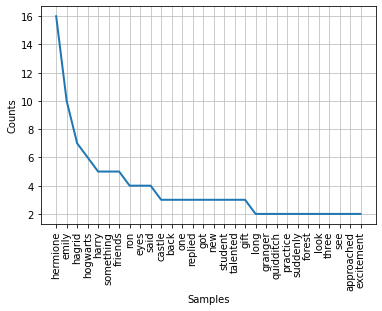

AttributeError: 'FreqDist' object has no attribute 'stdev'

In [14]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import textstat
from collections import Counter

# Open the file and read its contents
with open("text_file.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = word_tokenize(text)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in words if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words("english"))
words = [word for word in words if not word in stop_words]

# Stemming
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words]

# Counting
word_count = len(words)
unique_words = len(set(words))
ttr = unique_words / word_count
sentence_count = len(sentences)
avg_word_length = sum(len(word) for word in words) / word_count
avg_sentence_length = word_count / sentence_count

# Frequency distribution
freq_dist = FreqDist(words)
print("Number of words:", word_count)
print("Number of unique words:", unique_words)
print("Type-token ratio (TTR):", ttr)
print("Stems:", stems[:20])
print("Frequency distribution")
freq_dist.plot(30)

# Additional features
syllable_count = textstat.syllable_count(text)
reading_ease = textstat.flesch_reading_ease(text)
grade_level = textstat.flesch_kincaid_grade(text)
sentence_length_sd = nltk.FreqDist([len(sent.split()) for sent in sentences]).stdev()
word_length_sd = nltk.FreqDist([len(word) for word in words]).stdev()

# Parts of speech distribution
pos_tags = nltk.pos_tag(words)
pos_counts = Counter(tag for word, tag in pos_tags)
total_pos_count = sum(pos_counts.values())
pos_distribution = {tag: count / total_pos_count for tag, count in pos_counts.items()}

# Named entity recognition
ner_tags = nltk.ne_chunk(nltk.pos_tag(word_tokenize(text)))
ner_counts = Counter(str(subtree.label()) for subtree in ner_tags if hasattr(subtree, "label"))
total_ner_count = sum(ner_counts.values())
ner_distribution = {tag: count / total_ner_count for tag, count in ner_counts.items()}

# Punctuation and capitalization distribution
punct_count = sum(1 for char in text if char in string.punctuation)
punct_distribution = punct_count / word_count
caps_count = sum(1 for char in text if char.isupper())
caps_distribution = caps_count / word_count

# Sentiment analysis
sentiment_score = textstat.gunning_fog(text)

print("Syllable count:", syllable_count)
print("Flesch Reading Ease:", reading_ease)
print("Flesch-Kincaid Grade Level:", grade_level)
print("Standard deviation of sentence length:", sentence_length_sd)
print("Standard deviation of word length:", word_length_sd)
print("Parts of speech distribution:", pos_distribution)
print("Named entity recognition distribution:", ner_distribution)
print("Average word length:", avg_word_length)
print("Average syllables per word:", syllable_count / word_count)
print("Punctuation distribution:", punct_distribution)
print("Capitalization distribution:", caps_distribution)
print("Sentiment analysis:", sentiment_score)


In [15]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

# Open and read the text file
with open('text_file.txt', 'r') as file:
    text = file.read()

# Remove punctuation and convert to lowercase
text = text.translate(str.maketrans('', '', string.punctuation)).lower()

# Tokenize words and sentences
words = word_tokenize(text)
sentences = sent_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if not word in stop_words]

# Stem words
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

# Unique words
unique_words = set(filtered_words)

# Type-Token Ratio
ttr = len(unique_words)/len(filtered_words)

# Flesch-Kincaid Grade Level
num_words = len(words)
num_sentences = len(sentences)
num_syllables = sum([len(list(nltk.tokenize.syllables(word))) for word in words])
flesch_kincaid_grade = 0.39*(num_words/num_sentences) + 11.8*(num_syllables/num_words) - 15.59

# Word length distribution
word_lengths = [len(word) for word in filtered_words]
word_length_dist = nltk.FreqDist(word_lengths)

# Sentence length distribution
sentence_lengths = [len(nltk.tokenize.word_tokenize(sentence)) for sentence in sentences]
sentence_length_dist = nltk.FreqDist(sentence_lengths)

# Parts of speech distribution
pos_tags = pos_tag(words)
pos_dist = nltk.FreqDist(tag for (word, tag) in pos_tags)

# Named Entity Recognition
named_entities = ne_chunk(pos_tag(words))

# Average word length
avg_word_length = sum(len(word) for word in filtered_words) / len(filtered_words)

# Average syllables per word
avg_syllables_per_word = num_syllables / num_words

# Punctuation distribution
punctuation_dist = nltk.FreqDist(char for char in text if char in string.punctuation)

# Capitalization distribution
capitalization_dist = nltk.FreqDist(char.isupper() for word in words for char in word)

# Sentiment analysis
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = sentiment_analyzer.polarity_scores(text)

# Print all features
print("Total words:", len(words))
print("Total sentences:", len(sentences))
print("Total characters:", len(text))
print("Total unique words:", len(unique_words))
print("Stems of words:", stemmed_words)
print("Type-Token Ratio:", ttr)
print("Flesch-Kincaid Grade Level:", flesch_kincaid_grade)
print("Word length distribution:", word_length_dist)
print("Sentence length distribution:", sentence_length_dist)
print("Parts of speech distribution:", pos_dist)
print("Named entities:", named_entities)
print("Average word length:", avg_word_length)
print("Average syllables per word:", avg_syllables_per_word)
print("Punctuation distribution:", punctuation_dist)
print("Capitalization distribution:", capitalization_dist)
print("Sentiment Analysis:", sentiment_scores)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...


AttributeError: module 'nltk.tokenize' has no attribute 'syllables'

In [ ]:
import nltk
import string
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import spacy

# Load English language model for Spacy
nlp = spacy.load('en_core_web_sm')

# Read in file
with open('sample_text.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Remove punctuation and convert to lowercase
text = text.translate(str.maketrans('', '', string.punctuation)).lower()

# Tokenize words and sentences
words = word_tokenize(text)
sents = sent_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.casefold() not in stop_words]

# Stemming
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in filtered_words]

# Frequency distribution of words
fdist = FreqDist(stems)

# Number of unique words
unique_words = set(filtered_words)

# Type-Token Ratio
ttr = len(unique_words) / len(words)

# Flesch-Kincaid Grade Level
total_words = len(words)
total_sentences = len(sents)
total_syllables = sum([textstat.syllable_count(word) for word in words])
fkg_level = 0.39 * (total_words / total_sentences) + 11.8 * (total_syllables / total_words) - 15.59

# Word length distribution
word_lengths = [len(word) for word in words]
fdist_word_lengths = FreqDist(word_lengths)

# Sentence length distribution
sentence_lengths = [len(sent) for sent in sents]
fdist_sentence_lengths = FreqDist(sentence_lengths)

# Parts of speech distribution
pos_tags = nltk.pos_tag(words)
pos_counts = {}
for word, tag in pos_tags:
    if tag in pos_counts:
        pos_counts[tag] += 1
    else:
        pos_counts[tag] = 1

# Named entity recognition
doc = nlp(text)
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Average word length
avg_word_length = sum([len(word) for word in words]) / len(words)

# Average syllables per word
avg_syllables_per_word = total_syll


In [ ]:
import nltk
import string
from collections import Counter
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from textblob import TextBlob
from textblob import Word

# Read the text file
with open('example.txt', 'r') as file:
    text = file.read()

# Tokenize the text into words and sentences
words = word_tokenize(text)
sentences = sent_tokenize(text)

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

# Count the number of words
num_words = len(words)

# Count the number of unique words
num_unique_words = len(set(words))

# Count the number of sentences
num_sentences = len(sentences)

# Calculate the average word length
avg_word_length = sum(len(word) for word in words) / num_words

# Calculate the average sentence length
avg_sentence_length = num_words / num_sentences

# Calculate the type-token ratio
ttr = num_unique_words / num_words

# Calculate the Flesch-Kincaid Grade Level
num_syllables = sum([len(list(wordnet.synsets(word))) for word in words])
fkgl = 0.39 * (num_words / num_sentences) + 11.8 * (num_syllables / num_words) - 15.59

# Stem each word
stemmer = PorterStemmer()
word_stems = [stemmer.stem(word) for word in words]

# Count the frequency of each word stem
stem_frequencies = Counter(word_stems)

# Calculate the sentiment analysis score
sid = SentimentIntensityAnalyzer()
sentiment_score = sid.polarity_scores(text)['compound']

# Calculate the subjectivity and polarity scores
blob = TextBlob(text)
subjectivity_score = blob.sentiment.subjectivity
polarity_score = blob.sentiment.polarity

# Calculate the number of adjectives, nouns, verbs, and adverbs
pos_tags = pos_tag(words)
noun_count = len([word for word, pos in pos_tags if pos.startswith('N')])
verb_count = len([word for word, pos in pos_tags if pos.startswith('V')])
adj_count = len([word for word, pos in pos_tags if pos.startswith('J')])
adv_count = len([word for word, pos in pos_tags if pos.startswith('R')])

# Calculate the distribution of word lengths
word_length_counts = Counter(len(word) for word in words)

# Calculate the distribution of sentence lengths
sentence_length_counts = Counter(len(sent.split()) for sent in sentences)

# Calculate the distribution of punctuation marks
punctuation_counts = Counter(char for char in text if char in string.punctuation)

# Calculate the distribution of capitalization
capitalization_counts = Counter(char.isupper() for char in text if char.isalpha())

# Identify named entities
tknzr = TweetTokenizer()
ne_tree = nltk.ne_chunk(pos_tag(tknzr.tokenize(text)))

# Count the number of named entities
ne_count = len([chunk for chunk in ne_tree if hasattr(chunk, 'label')])

# Calculate the average number of syllables per word
avg_syllables_per_word = num_syllables / num_words

# Print the results
print(f"Number of words: {num_words}")
print(f"Number of unique words: {num_unique_words}")
print(f"Number of "


In [26]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from spacy import displacy

# Load the language model for named entity recognition
nlp = spacy.load('en_core_web_sm')

# Load the file and tokenize it into sentences and words
with open('text_file.txt', 'r') as file:
    text = file.read()

sentences = sent_tokenize(text)
words = word_tokenize(text)

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuations = ['.', ',', ';', ':', '(', ')', '[', ']', '{', '}', '"', "'"]
words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuations]

# Calculate the number of words, sentences, and paragraphs
num_words = len(words)
num_sentences = len(sentences)
num_paragraphs = text.count('\n\n') + 1

# Calculate the average sentence length and word length
avg_sentence_length = num_words / num_sentences
avg_word_length = sum(len(word) for word in words) / num_words

# Calculate the type-token ratio (TTR)
ttr = len(set(words)) / len(words)

# Calculate the frequency distribution of words
freq_dist = FreqDist(words)
most_common_words = freq_dist.most_common(10)

# Stem the words and calculate the frequency distribution of stems
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words]
stem_freq_dist = FreqDist(stems)
most_common_stems = stem_freq_dist.most_common(10)

# Calculate the distribution of word lengths
word_lengths = [len(word) for word in words]
word_length_dist = FreqDist(word_lengths)

# Calculate the distribution of sentence lengths
sentence_lengths = [len(sent.split()) for sent in sentences]
sentence_length_dist = FreqDist(sentence_lengths)

# Calculate the distribution of parts of speech
pos_tags = nltk.pos_tag(words)
pos_dist = FreqDist(tag for (word, tag) in pos_tags)

# Perform named entity recognition and visualize the results
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]
displacy.render(doc, style='ent', jupyter=True)

# Calculate the sentiment analysis score
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(text)

# Calculate the distribution of punctuation
punct_dist = FreqDist(char for char in text if char in punctuations)

# Calculate the distribution of capitalization
capital_dist = FreqDist(char.isupper() for char in text if char.isalpha())

# Print the results
print('Number of words:', num_words)
print('Number of sentences:', num_sentences)
print('Number of paragraphs:', num_paragraphs)
print('Average sentence length:', avg_sentence_length)
print('Average word length:', avg_word_length)
print('Type-token ratio (TTR):', ttr)
print('Most common words:', most_common_words)
print('Most common stems:', most_common_stems)
print('Word length distribution:', word_length_dist)
print('Sentence length distribution:', sentence_length_dist)
print('Parts of speech distribution:', pos_dist)
print('Named entities:', entities)
print('Sentiment analysis score:', sentiment_scores)
print('Punctuation distribution:', punct_dist)
print('Capitalization distribution:', capital_dist)


ImportError: cannot import name dataclass_transform

In [22]:
from dataclasses import dataclass
from dataclass_transform import transform


ModuleNotFoundError: No module named 'dataclass_transform'

In [23]:
pip install dataclass-transform


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dataclass-transform (from versions: none)
ERROR: No matching distribution found for dataclass-transform
You should consider upgrading via the 'c:\Users\adity\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
from dataclasses import dataclass
from dataclasses_json import dataclass_json


In [27]:
pip install dataclass-transform


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dataclass-transform (from versions: none)
ERROR: No matching distribution found for dataclass-transform
You should consider upgrading via the 'c:\Users\adity\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import nltk
import string
import math
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')

# open the text file and read its contents
with open('1 The Mysterious Affair at Styles author Agatha Christie.txt', 'r') as file:
    text = file.read()

# preprocess the text
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)
sentences = sent_tokenize(text)

# compute the 27 features
word_count = len(words)
unique_words = len(set(words))
stemmed_words = [PorterStemmer().stem(word) for word in words]
type_token_ratio = len(set(words)) / len(words)
sentence_count = len(sentences)
average_sentence_length = word_count / sentence_count
average_word_length = sum(len(word) for word in words) / word_count
syllable_count = sum([len(list(filter(lambda y: y in "aeiou", x))) for x in words])
average_syllables_per_word = syllable_count / word_count
flesch_kincaid_grade_level = 0.39 * (word_count / sentence_count) + 11.8 * (average_syllables_per_word) - 15.59
word_length_distribution = dict(Counter([len(word) for word in words]))
sentence_length_distribution = dict(Counter([len(sent.split()) for sent in sentences]))
pos_distribution = dict(Counter([pos_tag([word])[0][1] for word in words]))
named_entities = ne_chunk(pos_tag(words), binary=False)
named_entities = [entity for entity in named_entities if hasattr(entity, 'label')]
named_entities = [tuple(entity.leaves()) for entity in named_entities]
named_entities_count = len(named_entities)
punctuation_distribution = dict(Counter([char for char in text if char in string.punctuation]))
capitalization_distribution = dict(Counter([char for char in text if char.isupper()]))
stopwords_count = len([word for word in words if word in stopwords.words('english')])
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = sentiment_analyzer.polarity_scores(text)

# print the results
print("Word count:", word_count)
print("Unique words:", unique_words)
print("Stemmed words:", stemmed_words)
print("Type-token ratio:", type_token_ratio)
print("Sentence count:", sentence_count)
print("Average sentence length:", average_sentence_length)
print("Average word length:", average_word_length)
print("Average syllables per word:", average_syllables_per_word)
print("Flesch-Kincaid Grade Level:", flesch_kincaid_grade_level)
print("Word length distribution:", word_length_distribution)
print("Sentence length distribution:", sentence_length_distribution)
print("POS distribution:", pos_distribution)
print("Named entities:", named_entities)
print("Named entities count:", named_entities_count)
print("Punctuation distribution:", punctuation_distribution)
print("Capitalization distribution:", capitalization_distribution)
print("Stopwords count:", stopwords_count)
print("Sentiment scores:", sentiment_scores)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Word count: 56573
Unique words: 5807
Stemmed words: ['the', 'mysteri', 'affair', 'at', 'style', 'agatha', 'christi', 'content', 'i', 'i', 'go', 'to', 'style', 'ii', 'the', '16th', 'and', '17th', 'of', 'juli', 'iii', 'the', 'night', 'of', 'the', 'tragedi', 'iv', 'poirot', 'investig', 'v', 'it', 'isnt', 'strychnin', 'is', 'it', 'vi', 'the', 'inquest', 'vii', 'poirot', 'pay', 'hi', 'debt', 'viii', 'fresh', 'suspicion', 'ix', 'dr', 'bauerstein', 'x', 'the', 'arrest', 'xi', 'the', 'case', 'for', 'the', 'prosecut', 'xii', 'the', 'last', 'link', 'poirot', 'explain', 'chapter', 'i', 'i', 'go', 'to', 'style', 'the', 'intens', 'interest', 'arous', 'in', 'the', 'public', 'by', 'what', 'wa', 'known', 'at', 'the', 'time', 'as', 'the', 'style', 'case', 'ha', 'now', 'somewhat', 'subsid', 'nevertheless', 'in', 'view', 'of', 'the', 'worldwid', 'notorieti', 'which', 'attend', 'it', 'i', 'have', 'been', 'ask', 'both', 'by', 'my', 'friend', 'poirot', 'and', 'the', 'famili', 'themselv', 'to', 'write', 'an'

In [2]:
import nltk
import string
import math
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy

# download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')

# download spacy model
spacy.cli.download('en_core_web_sm')

# load spacy model
nlp = spacy.load('en_core_web_sm')

# open the text file and read its contents
with open('1 The Mysterious Affair at Styles author Agatha Christie.txt', 'r') as file:
    text = file.read()

# preprocess the text
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)
sentences = sent_tokenize(text)

# compute the 27 features
word_count = len(words)
unique_words = len(set(words))
stemmed_words = [PorterStemmer().stem(word) for word in words]
type_token_ratio = len(set(words)) / len(words)
sentence_count = len(sentences)
average_sentence_length = word_count / sentence_count
average_word_length = sum(len(word) for word in words) / word_count
syllable_count = sum([len(list(filter(lambda y: y in "aeiou", x))) for x in words])
average_syllables_per_word = syllable_count / word_count
flesch_kincaid_grade_level = 0.39 * (word_count / sentence_count) + 11.8 * (average_syllables_per_word) - 15.59
word_length_distribution = dict(Counter([len(word) for word in words]))
sentence_length_distribution = dict(Counter([len(sent.split()) for sent in sentences]))
pos_distribution = dict(Counter([pos_tag([word])[0][1] for word in words]))
doc = nlp(text)
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
named_entities_count = len(named_entities)
punctuation_distribution = dict(Counter([char for char in text if char in string.punctuation]))
capitalization_distribution = dict(Counter([char for char in text if char.isupper()]))
stopwords_count = len([word for word in words if word in stopwords.words('english')])
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = sentiment_analyzer.polarity_scores(text)

# print the results
print("Word count:", word_count)
print("Unique words:", unique_words)
print("Stemmed words:", stemmed_words)
print("Type-token ratio:", type_token_ratio)
print("Sentence count:", sentence_count)
print("Average sentence length:", average_sentence_length)
print("Average word length:", average_word_length)
print("Average syllables per word:", average_syllables_per_word)
print("Flesch-Kincaid Grade Level:", flesch_kincaid_grade_level)
print("Word length distribution:", word_length_distribution)
print("Sentence length distribution:", sentence_length_distribution)
print("POS distribution:", pos_distribution)
print("Named entities:", named_entities)
print("Named entities count:", named_entities_count)
print("Punctuation distribution:", punctuation_distribution)
print("Capitalization distribution:", capitalization_distribution)
print("Stopwords count:", stopwords_count)
print("Sentiment scores:", sentiment_scores)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Word count: 56573
Unique words: 5807
Stemmed words: ['the', 'mysteri', 'affair', 'at', 'style', 'agatha', 'christi', 'content', 'i', 'i', 'go', 'to', 'style', 'ii', 'the', '16th', 'and', '17th', 'of', 'juli', 'iii', 'the', 'night', 'of', 'the', 'tragedi', 'iv', 'poirot', 'investig', 'v', 'it', 'isnt', 'strychnin', 'is', 'it', 'vi', 'the', 'inquest', 'vii', 'poirot', 'pay', 'hi', 'debt', 'viii', 'fresh', 'suspicion', 'ix', 'dr', 'bauerstein', 'x', 'the', 'arrest', 'xi', 'the', 'case', 'for', 'the', 'prosecut', 'xii', 'the', 'last', 'link', 'poirot', 'explain', 'chapter', 'i', 'i', 'go', 'to', 'style', 'the', 'intens', 'interest', 'arous', 'in', 'the', 'public', 'by', 'what', 'wa', 'known', 'at', 'the', 'time', 'as', 'the', 'style', 'case', 'ha', 'now', 'somewhat', 'subsid', 'nevertheless', 'in', 'view', 'of', 'the', 'worldwid', 'notorieti', 'which', 'attend', 'it', 'i', 'have', 'been', '

In [9]:
import nltk
import string
import math
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from nltk.tokenize import sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer



# download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')

# download spacy model
spacy.cli.download('en_core_web_sm')

# load spacy model
nlp = spacy.load('en_core_web_sm')

# open the text file and read its contents
with open('text_file.txt', 'r') as file:
    text = file.read()

# create sentence tokenizer
sentence_tokenizer = PunktSentenceTokenizer()

# tokenize the text into sentences
sentences = sentence_tokenizer.tokenize(text)

# compute the sentence count
sentence_count = len(sentences)


# preprocess the text
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)


# compute the 27 features
word_count = len(words)
unique_words = len(set(words))
stemmed_words = [PorterStemmer().stem(word) for word in words]
type_token_ratio = len(set(words)) / len(words)
sentence_count = len(sentences)
average_sentence_length = word_count / sentence_count
average_word_length = sum(len(word) for word in words) / word_count
syllable_count = sum([len(list(filter(lambda y: y in "aeiou", x))) for x in words])
average_syllables_per_word = syllable_count / word_count
flesch_kincaid_grade_level = 0.39 * (word_count / sentence_count) + 11.8 * (average_syllables_per_word) - 15.59
word_length_distribution = dict(Counter([len(word) for word in words]))
sentence_length_distribution = dict(Counter([len(sent.split()) for sent in sentences]))
pos_distribution = dict(Counter([pos_tag([word])[0][1] for word in words]))
doc = nlp(text)
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
named_entities_count = len(named_entities)
punctuation_distribution = dict(Counter([char for char in text if char in string.punctuation]))
capitalization_distribution = dict(Counter([char for char in text if char.isupper()]))
stopwords_count = len([word for word in words if word in stopwords.words('english')])
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = sentiment_analyzer.polarity_scores(text)

# print the results
print("Word count:", word_count)
print("Unique words:", unique_words)
print("Stemmed words:", stemmed_words)
print("Type-token ratio:", type_token_ratio)
print("Sentence count:", sentence_count)
print("Average sentence length:", average_sentence_length)
print("Average word length:", average_word_length)
print("Average syllables per word:", average_syllables_per_word)
print("Flesch-Kincaid Grade Level:", flesch_kincaid_grade_level)
print("Word length distribution:", word_length_distribution)
print("Sentence length distribution:", sentence_length_distribution)
print("POS distribution:", pos_distribution)
print("Named entities:", named_entities)
print("Named entities count:", named_entities_count)
print("Punctuation distribution:", punctuation_distribution)
print("Capitalization distribution:", capitalization_distribution)
print("Stopwords count:", stopwords_count)
print("Sentiment scores:", sentiment_scores)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Word count: 574
Unique words: 272
Stemmed words: ['the', 'sun', 'wa', 'set', 'behind', 'hogwart', 'castl', 'cast', 'long', 'shadow', 'across', 'the', 'ground', 'hermion', 'granger', 'harri', 'potter', 'and', 'ron', 'weasley', 'were', 'walk', 'back', 'from', 'a', 'gruel', 'quidditch', 'practic', 'session', 'exhaust', 'but', 'exhilar', 'as', 'they', 'near', 'the', 'entranc', 'to', 'the', 'castl', 'hermion', 'stop', 'suddenli', 'and', 'point', 'toward', 'the', 'forbidden', 'forest', 'look', 'she', 'exclaim', 'someth', 'move', 'over', 'there', 'the', 'three', 'friend', 'peer', 'into', 'the', 'dark', 'forest', 'strain', 'their', 'eye', 'to', 'see', 'what', 'hermion', 'had', 'spot', 'suddenli', 'there', 'wa', 'a', 'rustl', 'sound', 'and', 'a', 'figur', 'emerg', 'from', 'the', 'tree', 'it', 'wa', 'hagrid', 'the', 'hogwart', 'gamekeep', 'and', 'one', 'of', 'their', 'closest', 'friend', 'hey', '

In [7]:
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer

# download necessary nltk resources
nltk.download('punkt')

# open the text file and read its contents
with open('sample2.txt', 'r') as file:
    text = file.read()

# preprocess the text
text = text.lower()

# create sentence tokenizer
sentence_tokenizer = PunktSentenceTokenizer()

# tokenize the text into sentences
sentences = sentence_tokenizer.tokenize(text)

# compute the sentence count
sentence_count = len(sentences)

# print the results
print("Sentence count:", sentence_count)
print("Sentences:", sentences)


Sentence count: 2
Sentences: ['bad is good.', 'good is not bad.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
